In [1]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
#from graphviz import Digraph  

In [2]:
print(__doc__)

Automatically created module for IPython interactive environment


In [3]:
def make_meshgrid(x, y, h=.01):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [4]:
# import some data to play with
iris = datasets.load_iris()
y = iris.target

# Classifier Titles
titles = ('LinearSVC (linear kernel)',
          'SVC with Linear kernel',
          'SVC with Polynomial (degree 3) kernel',
          'SVC with Polynomial (degree 5) kernel',
          'SVC with RBF kernel',
          'SVC with Sigmoid kernel')

# Feature Titles
IrisF=("sepal length in cm", 
       "sepal width in cm", 
       "petal length in cm", 
       "petal width in cm")

Records = []
caseNum = 0

In [5]:
def train_record_plot_SVMs(fdx):
    global caseNum, Records, IrisF, titles, y, iris
    X = np.array([[row[i] for i in fdx] for row in iris.data])

    C = 1.0  # SVM regularization parameter
    models = (svm.LinearSVC(C=C),
              svm.SVC(kernel='linear', C=C),
              svm.SVC(kernel='poly', gamma=0.7, C=C),
              svm.SVC(kernel='poly', gamma=0.7, degree=5, C=C),
              svm.SVC(kernel='rbf', C=C),
              svm.SVC(kernel='sigmoid', C=C))
    models = (clf.fit(X, y) for clf in models)
    
    if len(fdx)==2:
        # Set-up 3x2 grid for plotting.
        fig, sub = plt.subplots(nrows=3, ncols=2, figsize= (14,14))
        plt.subplots_adjust(wspace=0.2, hspace=0.2)

        xx, yy = make_meshgrid(X[:, 0], X[:, 1])

        for clf, title, ax in zip(models, titles, sub.flatten()):
            try:
                Records.append((caseNum, title, clf.kernel, clf.n_support_, fdx, clf.score(X,y)))
            except AttributeError:
                Records.append((caseNum, title, 'linear', '', fdx, clf.score(X,y)))
            caseNum += 1
            plot_contours(ax, clf, xx, yy,
                          cmap=plt.cm.coolwarm, alpha=0.8)
            ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=40, edgecolors='k')
            try:
                ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:,1], c=y[clf.support_], cmap=plt.cm.coolwarm, s=60, edgecolors='k', marker="X")
            except AttributeError:
                pass
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xlabel(IrisF[fdx[0]])
            ax.set_ylabel(IrisF[fdx[1]])
            ax.set_xticks(())
            ax.set_yticks(())
            ax.set_title(title)
        plt.show()
    else:
        for clf, title in zip(models, titles):
            try:
                Records.append((caseNum, title, clf.kernel, clf.n_support_ , fdx, clf.score(X,y)))
            except AttributeError:
                Records.append((caseNum, title, 'linear', '', fdx, clf.score(X,y)))
            caseNum += 1

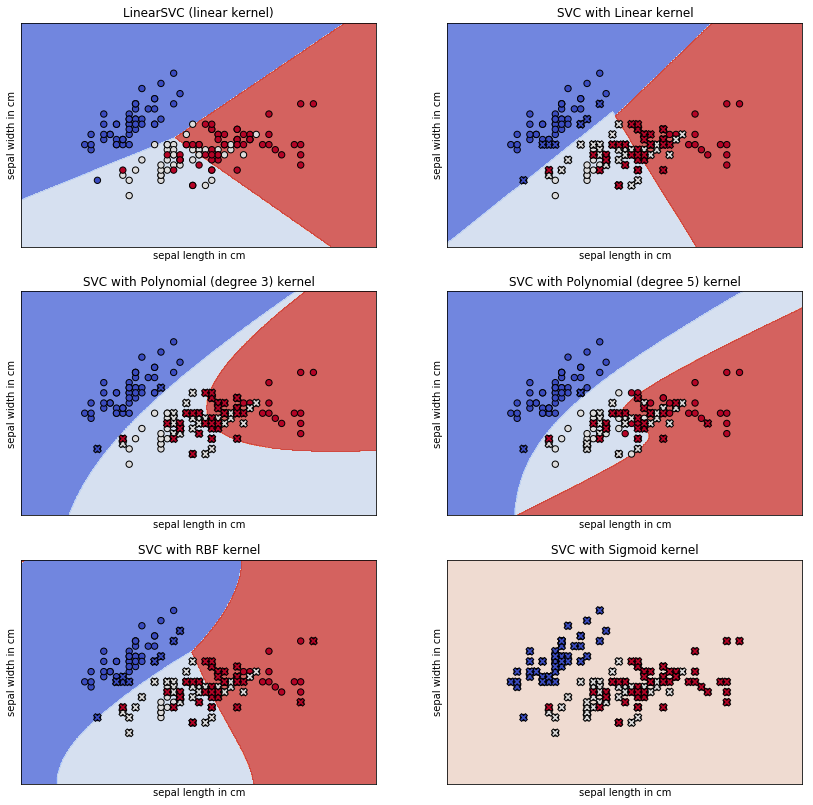

In [6]:
# Selected Features: 0 and 1
fdx = np.array([0,1])
train_record_plot_SVMs(fdx)

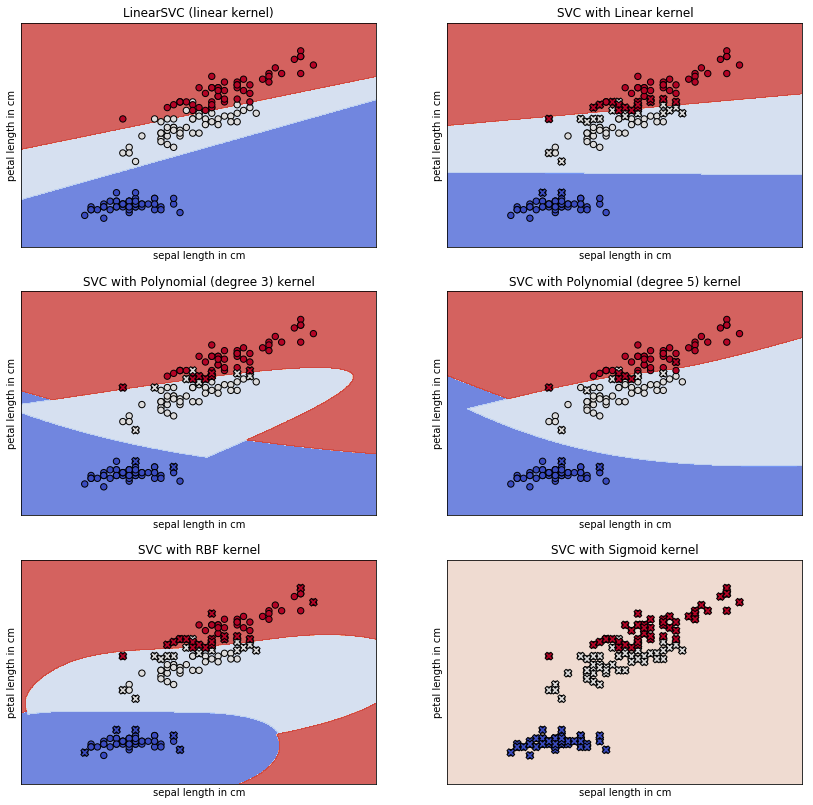

In [7]:
# Selected Features: 0 and 2
fdx = np.array([0,2])
train_record_plot_SVMs(fdx)

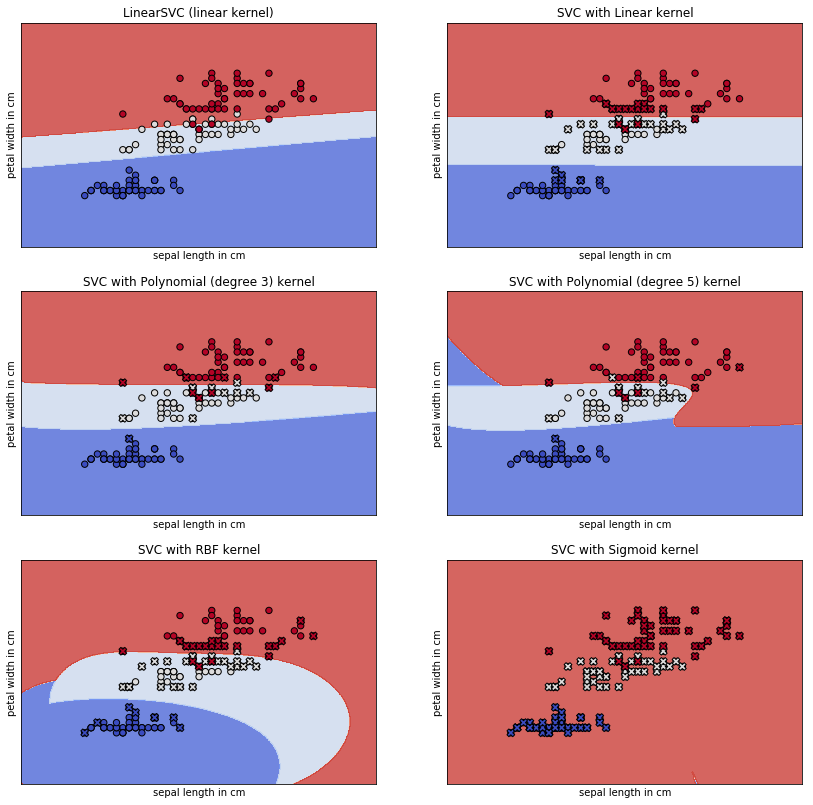

In [8]:
# Selected Features: 0 and 3
fdx = np.array([0,3])
train_record_plot_SVMs(fdx)

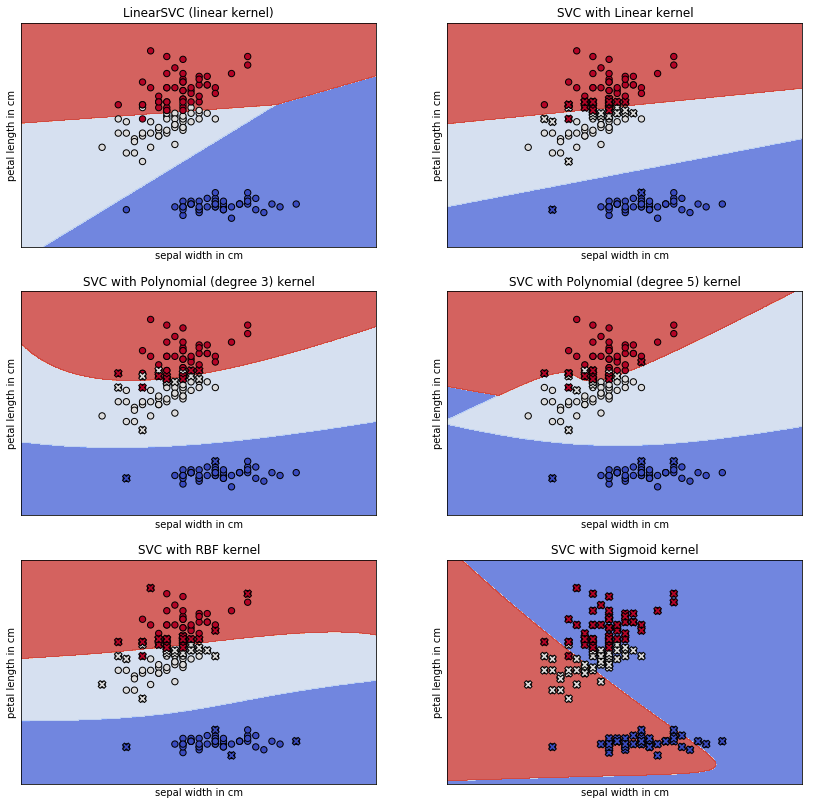

In [9]:
# Selected Features: 1 and 2
fdx = np.array([1,2])
train_record_plot_SVMs(fdx)

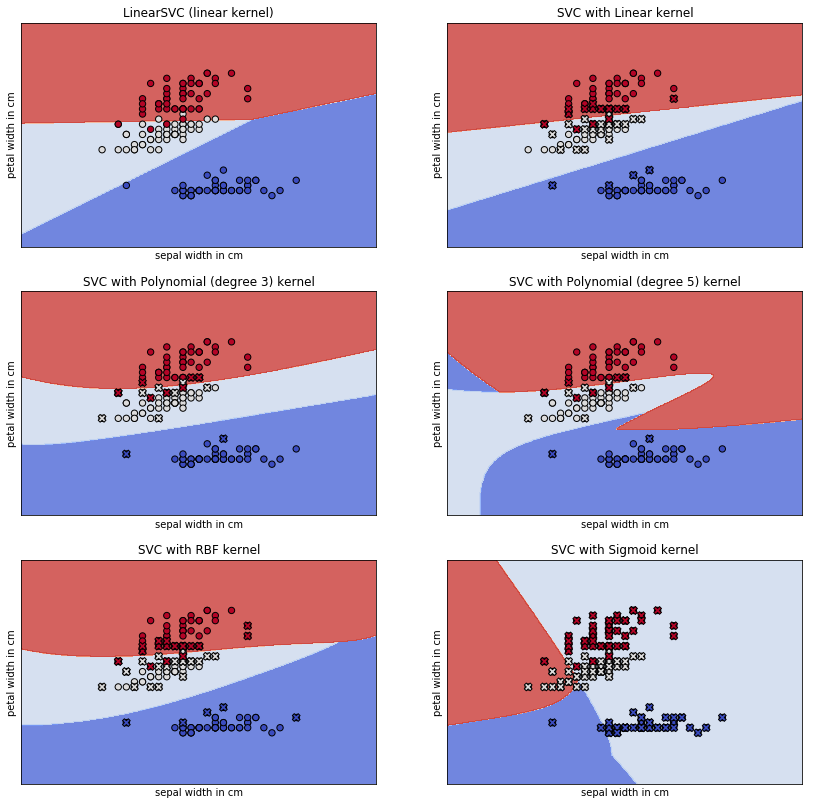

In [10]:
# Selected Features: 1 and 3
fdx = np.array([1,3])
train_record_plot_SVMs(fdx)

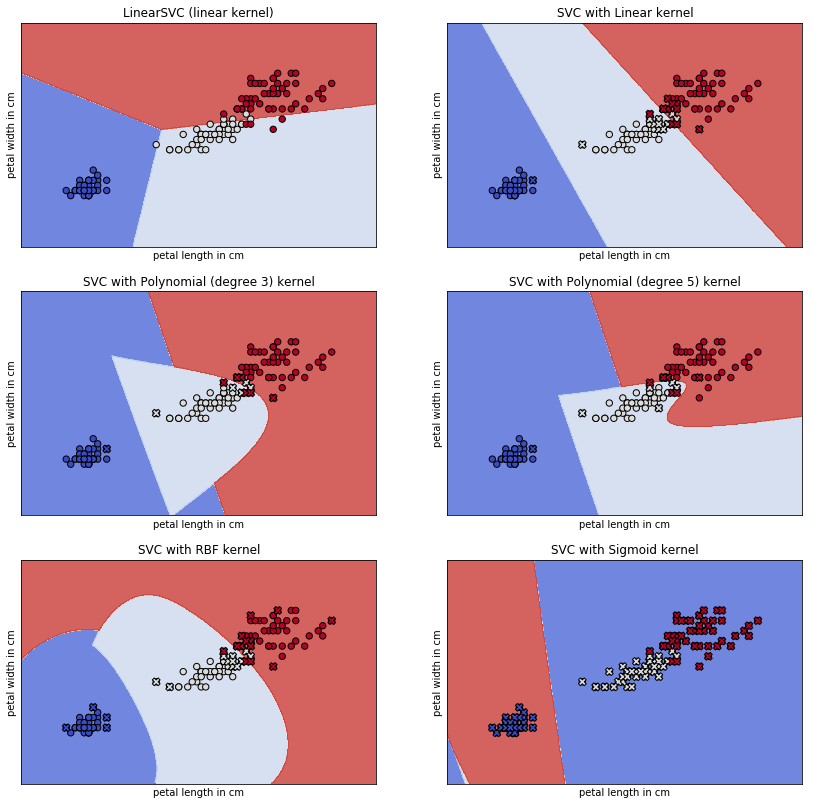

In [11]:
# Selected Features: 2 and 3
fdx = np.array([2,3])
train_record_plot_SVMs(fdx)

In [12]:
# Three and Four feature cases not visualized but recorded in table for 

# Selected Features: 0,1,2
fdx = np.array([0,1,2])
train_record_plot_SVMs(fdx)
# Selected Features: 0,1,3
fdx = np.array([0,1,3])
train_record_plot_SVMs(fdx)
# Selected Features: 0,2,3
fdx = np.array([0,2,3])
train_record_plot_SVMs(fdx)
# Selected Features: 1,2,3
fdx = np.array([1,2,3])
train_record_plot_SVMs(fdx)
# Selected Features: 0,1,2,3
fdx = np.array([0,1,2,3])
train_record_plot_SVMs(fdx)

In [13]:
from prettytable import PrettyTable
t = PrettyTable(['Case Num', 'SVM Title', 'Kernel', 'Num Support Vectors', 'Features', 'Score'])
for record in Records:
    t.add_row(record)
print(t)

+----------+---------------------------------------+---------+---------------------+-----------+------------------+
| Case Num |               SVM Title               |  Kernel | Num Support Vectors |  Features |      Score       |
+----------+---------------------------------------+---------+---------------------+-----------+------------------+
|    0     |       LinearSVC (linear kernel)       |  linear |                     |   [0 1]   |       0.8        |
|    1     |         SVC with Linear kernel        |  linear |      [ 8 39 34]     |   [0 1]   |       0.82       |
|    2     | SVC with Polynomial (degree 3) kernel |   poly  |      [ 2 34 34]     |   [0 1]   |  0.813333333333  |
|    3     | SVC with Polynomial (degree 5) kernel |   poly  |      [ 3 26 24]     |   [0 1]   |  0.806666666667  |
|    4     |          SVC with RBF kernel          |   rbf   |      [11 41 35]     |   [0 1]   |  0.826666666667  |
|    5     |        SVC with Sigmoid kernel        | sigmoid |      [50 

In [14]:
#Discussion:
# The code from class was taken and modified above to create a general framework for different combinantions of 
# features. Records for each case applied were kept including kernel type, number of support vectors per class,
# features used, and final score on data. The SVC class provides many attributes for analysis of the trained 
# classifiers while the LinearSVC class only provides intercept and coefficients, which were not used in this 
# submission. This lack of availability of attributes was limiting so LinearSVC classifiers were left out in much 
# of the analysis.
# 
# In terms of results, there were some interesting patterns seen between the kernels applied to the SciKit Learn
# SVM.SVC classifiers. First, the sigmoid kernal was never able to perform better than chance, often performing
# much worse. The sigmoid kernel may just not be a good fit for this dataset. For the other kernels, they seem to
# be able to perform much better with a varying number of support vectors used. The RBF kernel utilized the most
# support vectors, followed by the linear kernel, and then the two polynomial kernels used. Performance was often
# the best on the polynomial kernel with degree 5 which also often utilized the lowest number of support vectors.